# Homework Starter — Stage 10a: Linear Regression

Use this as a scaffold if your project data isn’t ready. Replace the synthetic data section with your dataset when possible.

In [6]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error
from sklearn.model_selection import train_test_split
import scipy.stats as st

sns.set()
np.random.seed(7)

## 1) Synthetic data (replace with your project data when ready)
- Finance-flavored factors and asset excess return
- Includes a quadratic effect to motivate specification checks

In [2]:
n = 200
dates = pd.bdate_range(start="2024-02-01", periods=n)
mkt_excess = np.random.normal(0, 0.011, size=n)
size = np.random.normal(0, 0.008, size=n)
value = np.random.normal(0, 0.009, size=n)
momentum = np.random.normal(0, 0.006, size=n)

beta0, beta_mkt, beta_size, beta_value, beta_mom, beta_mom2 = 0.0001, 0.9, 0.25, -0.15, 0.35, 3.5
noise_scale = 0.0035 + 0.5*np.abs(mkt_excess)
eps = np.random.normal(0, noise_scale)
asset_excess = (
    beta0 + beta_mkt*mkt_excess + beta_size*size + beta_value*value + beta_mom*momentum
    + beta_mom2*(momentum**2) + eps
)
df = pd.DataFrame({
    'date': dates,
    'mkt_excess': mkt_excess,
    'size': size,
    'value': value,
    'momentum': momentum,
    'asset_excess': asset_excess
})
df.head()

,date,mkt_excess,size,value,momentum,asset_excess
0,2024-02-01,0.018596,-0.013467,-0.000540,0.000141,0.014832
1,2024-02-02,-0.005125,0.008120,0.007089,-0.006840,-0.008599
2,2024-02-05,0.000361,-0.011532,-0.012885,-0.011216,-0.009577
3,2024-02-06,0.004483,-0.010749,0.003905,-0.010685,0.000033
4,2024-02-07,-0.008678,-0.002893,0.001250,0.002779,-0.005750


In [7]:
df = pd.read_csv (r"C:\Users\fangyi\bootcamp_fangyi_jiang\project\data\Processed\data_features.csv")
df['lagged moving average'] = df['moving average'].shift(1)
df = df.dropna()
df.head()

,date,close,daily return,moving average,lagged moving average
7,2025-04-10,190.42,-0.042394,194.087143,198.768571
8,2025-04-11,198.15,0.040594,190.410000,194.087143
9,2025-04-14,202.52,0.022054,190.314286,190.410000
10,2025-04-15,202.14,-0.001876,192.280000,190.314286
11,2025-04-16,194.27,-0.038933,194.110000,192.280000


## 2) Baseline model fit
Follow the steps; replace `df` with your project DataFrame when ready.

In [8]:
X = df[['lagged moving average']]
y = df['close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
lr = LinearRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
print(f'Baseline   R²={r2:.4f}  RMSE={rmse:.6f}')

Baseline   R²=-0.1046  RMSE=11.622503


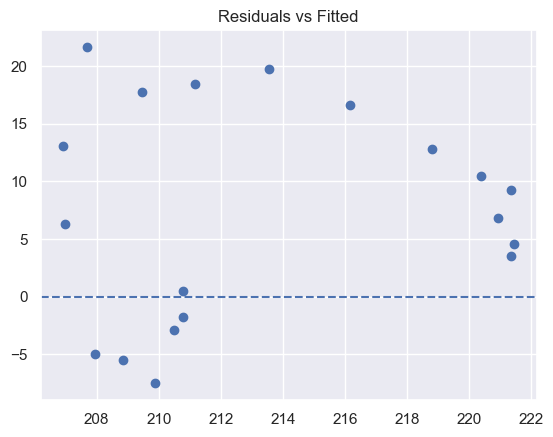

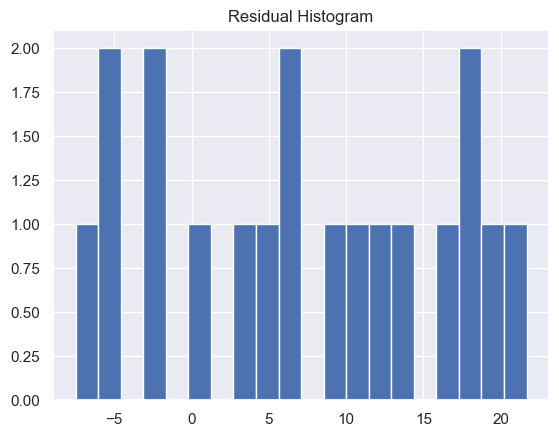

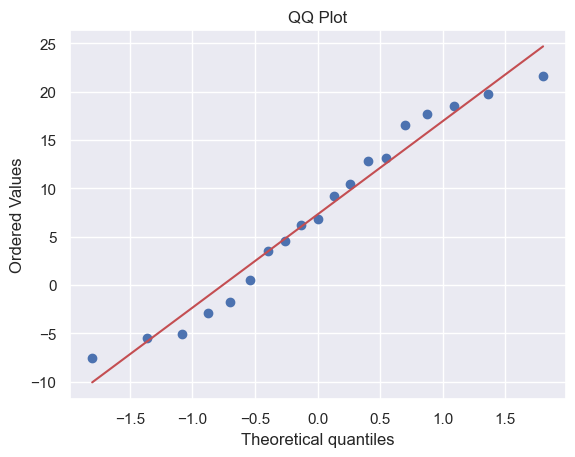

In [9]:
resid = y_test - y_pred
fitted = y_pred
plt.figure(); plt.scatter(fitted, resid); plt.axhline(0, ls='--'); plt.title('Residuals vs Fitted'); plt.show()
plt.figure(); plt.hist(resid, bins=20); plt.title('Residual Histogram'); plt.show()
plt.figure(); st.probplot(resid, dist='norm', plot=plt); plt.title('QQ Plot'); plt.show()

## 3) Optional: Add a transformed feature
Add a polynomial or interaction if diagnostics suggest mis-specification.

In [11]:
df['lag_ma_sq'] = df['lagged moving average']**2
X2 = df[['lag_ma_sq']]
X2_train, X2_test = X2.iloc[:len(X_train)], X2.iloc[len(X_train):]
lr2 = LinearRegression().fit(X2_train, y_train)
y_pred2 = lr2.predict(X2_test)
r2_2 = r2_score(y_test, y_pred2)
rmse_2 = root_mean_squared_error(y_test, y_pred2)
print(f'With x^2   R²={r2_2:.4f}  RMSE={rmse_2:.6f}')

With x^2   R²=-0.0511  RMSE=11.337311


## 4) Interpretation (write your conclusions below)
- Linearity: Violated, well it's crazy to assume that the closing price is linear to the lagged moving average
- Homoscedasticity: violated, the resiuals are not randomly scattered at 0.
- Normality: violated, the histogram doesnot show a bell shaped curve and the qq plot is not exactly a 45% line
- Independence: violated, there is probably autocorrelation between each day's stock price
- Which model do you trust and why?: neither, the base assumption that moving average is linearly related to stock price is wrong
- Next step you’d try: find market indicators or factors that actually are predictive of stock price to build models. This project is only to try out an entire project's lifecycle and not involve too much work.